In [1224]:
import  numpy  as  np
import  pandas  as  pd
import  os
raw_data_path =os.path.join(os.path.pardir,'data','raw')
train_file_path=os.path.join(raw_data_path,'train.csv')
test_file_path=os.path.join(raw_data_path,'test.csv')

train_df=pd.read_csv(train_file_path,index_col="Id")
test_df=pd.read_csv(test_file_path,index_col="Id")

In [1225]:
test_df["SalePrice"]= -1 

In [1226]:
df=pd.concat((train_df,test_df),axis=0)

In [1227]:
#df.info()


In [1228]:
df.loc[df.PoolArea==0,'PoolQC']='None' # Pool Quality is none where there is no pool

In [1229]:
df[df.PoolQC.isna()][['MSSubClass','PoolArea','OverallQual','OverallCond']]

,MSSubClass,PoolArea,OverallQual,OverallCond
Id,,,,
2421,20,368,4,6
2504,50,444,6,5
2600,20,561,3,5


In [1230]:

df.groupby(['PoolQC']).PoolArea.median()

PoolQC
Ex      370.0
Fa      583.5
Gd      657.0
None      0.0
Name: PoolArea, dtype: float64

In [1231]:
df.loc[(df.PoolQC.isna()) & (df.PoolArea<500),'PoolQC']='EX'


In [1232]:
df.loc[df.PoolQC.isna(),'PoolQC']='Fa'

In [1233]:
#df.info()

In [1234]:
pd.options.display.max_rows=15
df[['GarageCars','GarageArea']]


,GarageCars,GarageArea
Id,,
1,2.0,548.0
2,2.0,460.0
3,2.0,608.0
4,3.0,642.0
5,3.0,836.0
6,2.0,480.0
7,2.0,636.0
...,...,...
2913,1.0,286.0


In [1235]:
df.groupby(['GarageCars']).GarageArea.median()

GarageCars
0.0       0.0
1.0     288.0
2.0     506.0
3.0     807.5
4.0     892.0
5.0    1184.0
Name: GarageArea, dtype: float64

In [1236]:
df[df.GarageType.isna()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0.0,0.0,NaN,NaN
49,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
90,NaN,NaN,NaN,0.0,0.0,NaN,NaN
100,NaN,NaN,NaN,0.0,0.0,NaN,NaN
109,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2892,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [1237]:
df.loc[df.GarageYrBlt.isna(),'GarageYrBlt']=df.YearBuilt

In [1238]:
df[df.GarageType.isna()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,1955.0,NaN,0.0,0.0,NaN,NaN
49,NaN,1920.0,NaN,0.0,0.0,NaN,NaN
79,NaN,1968.0,NaN,0.0,0.0,NaN,NaN
89,NaN,1915.0,NaN,0.0,0.0,NaN,NaN
90,NaN,1994.0,NaN,0.0,0.0,NaN,NaN
100,NaN,1959.0,NaN,0.0,0.0,NaN,NaN
109,NaN,1919.0,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2892,NaN,1945.0,NaN,0.0,0.0,NaN,NaN


In [1239]:
df.loc[df.GarageType.isna(),'GarageType']='None';
df.loc[df.GarageType=='None','GarageFinish']='None';
df.loc[df.GarageType=='None','GarageQual']='None';
df.loc[df.GarageType=='None','GarageCond']='None';

In [1240]:
#df.info()

In [1241]:
df[df.GarageFinish.isna()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2127,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN
2577,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN


In [1242]:
median_cars_yearwise=df.groupby('GarageYrBlt').GarageCars.transform('median')

In [1243]:
df.GarageCars.fillna(median_cars_yearwise,inplace=True)

In [1244]:
df[df.GarageArea.isna()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2577,Detchd,1923.0,NaN,1.0,NaN,NaN,NaN


In [1245]:
median_garage_area_num_car_wise=df.groupby('GarageCars').GarageArea.transform('median')

In [1246]:
df.GarageArea.fillna(median_garage_area_num_car_wise,inplace=True)

In [1247]:
df[df.GarageFinish.isna()][['OverallQual','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

,OverallQual,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,,
2127,6,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN
2577,5,Detchd,1923.0,NaN,1.0,288.0,NaN,NaN


In [1248]:
df[df.GarageYrBlt<1930]['GarageFinish'].value_counts()

Unf     139
None     61
RFn       4
Fin       2
Name: GarageFinish, dtype: int64

In [1249]:
df.GarageFinish.fillna('Unf',inplace=True)

In [1250]:
df.groupby('GarageQual').GarageArea.median()

GarageQual
Ex      840.0
Fa      280.0
Gd      563.0
None      0.0
Po      226.0
TA      484.0
Name: GarageArea, dtype: float64

In [1251]:
pd.crosstab(df.GarageCond,df.GarageYrBlt)

GarageYrBlt,1872.0,1875.0,1890.0,1895.0,1896.0,1900.0,1902.0,1905.0,1906.0,1907.0,1908.0,1910.0,1911.0,1912.0,1914.0,1915.0,1916.0,1917.0,1918.0,1919.0,1920.0,1921.0,1922.0,1923.0,1924.0,1925.0,1926.0,1927.0,1928.0,1929.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1943.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2207.0
GarageCond,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Fa,0,0,0,0,0,1,0,0,0,0,0,5,0,0,1,2,2,1,0,0,11,0,5,1,3,2,0,0,2,1,3,0,1,1,0,0,1,0,2,0,0,1,0,0,0,0,0,1,0,6,1,0,0,1,1,2,1,2,0,1,1,0,0,2,2,0,0,0,0,1,0,1,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gd,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
None,1,1,2,2,0,3,1,1,0,1,0,10,1,3,4,3,2,0,1,2,9,0,5,3,2,3,1,0,0,0,3,2,0,0,0,2,1,0,1,0,6,2,0,0,3,4,4,0,2,0,1,0,0,1,6,1,0,2,3,1,2,2,0,1,1,0,2,1,0,10,5,2,0,1,3,0,1,1,0,0,0,0,0,0,1,0,2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,3,3,3,2,0,0,0,0
Po,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TA,0,0,0,1,1,5,0,0,1,0,1,2,0,0,1,5,3,1,3,1,20,5,3,5,5,13,14,5,5,1,22,4,3,0,3,8,6,5,9,21,24,13,6,1,10,9,5,17,14,44,16,15,23,36,23,39,33,40,35,36,30,35,34,32,32,36,36,48,32,30,24,26,29,35,28,49,63,40,34,32,14,9,10,19,17,11,16,20,19,24,17,27,49,39,35,40,43,58,54,55,41,53,92,99,142,115,115,60,29,5,1


In [1252]:
df.GarageCond.fillna('TA',inplace=True)

In [1253]:
df.GarageQual.fillna('TA',inplace=True)

In [1254]:
df[df.MSZoning.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,NaN,NaN,0,3,2009,ConLD,Normal,-1
2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,NaN,NaN,0,2,2008,WD,Abnorml,-1
2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,None,NaN,NaN,0,1,2008,WD,Normal,-1
2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,None,NaN,NaN,0,5,2006,WD,Normal,-1


In [1255]:
df.MiscFeature.fillna('None',inplace=True)

In [1256]:
#df.info()

In [1257]:
#df.Alley.fillna('None',inplace=True)

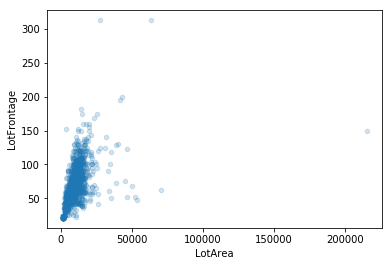

In [1258]:
df.plot.scatter(x='LotArea',y='LotFrontage',alpha=0.2);

In [1259]:
df.LotArea.min()

1300

In [1260]:
df.LotArea.max()

215245

In [1261]:
df.LotArea.median()

9453.0

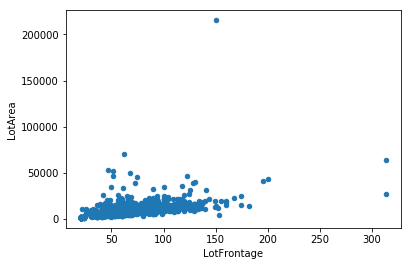

In [1262]:
%matplotlib inline
df.plot.scatter('LotFrontage','LotArea');

In [1263]:
df[['LotFrontage','LotArea','LotConfig','LotShape']]

,LotFrontage,LotArea,LotConfig,LotShape
Id,,,,
1,65.0,8450,Inside,Reg
2,80.0,9600,FR2,Reg
3,68.0,11250,Inside,IR1
4,60.0,9550,Corner,IR1
5,84.0,14260,FR2,IR1
6,85.0,14115,Inside,IR1
7,75.0,10084,Inside,Reg
...,...,...,...,...
2913,21.0,1533,Inside,Reg


In [1264]:
df.groupby('LotConfig').agg({'LotFrontage':'mean','LotFrontage':'median','LotArea':'mean'})

,LotFrontage,LotArea
LotConfig,,
Corner,80.0,10843.315068
CulDSac,50.0,15638.221591
FR2,62.0,10595.976471
FR3,66.0,10498.857143
Inside,66.0,9535.781528


In [1265]:
mean_frontage=df.groupby('LotConfig').LotFrontage.transform('mean')

In [1266]:
df.LotFrontage.fillna(mean_frontage,inplace=True)

In [1267]:
#df.info()

In [1268]:
df[df.Utilities.isna()]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.000000,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,NaN,None,0,3,2009,ConLD,Normal,-1
1946,20,RL,61.276923,31220,Pave,NaN,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,None,NaN,Shed,750,5,2008,WD,Normal,-1


In [1269]:
df.groupby('MSZoning').Utilities.value_counts()

MSZoning  Utilities
C (all)   AllPub         25
FV        AllPub        139
RH        AllPub         26
RL        AllPub       2263
          NoSeWa          1
RM        AllPub        460
Name: Utilities, dtype: int64

In [1270]:
df.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [1271]:
df.Utilities.fillna('AllPub',inplace=True)

In [1272]:
#df.info()

In [1273]:
df[df.Exterior2nd.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,None,1940.0,None,0.0,0.0,None,None,Y,0,39,0,0,0,0,None,NaN,None,0,1,2008,WD,Normal,-1


In [1274]:
df.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
           ... 
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, Length: 16, dtype: int64

In [1275]:
df.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [1276]:
df.Exterior1st.fillna('VinylSd',inplace=True)
df.Exterior2nd.fillna('VinylSd',inplace=True)

In [1277]:
df[df.FireplaceQu.isna()][['Fireplaces','FireplaceQu']]


,Fireplaces,FireplaceQu
Id,,
1,0,NaN
6,0,NaN
11,0,NaN
13,0,NaN
16,0,NaN
18,0,NaN
19,0,NaN
...,...,...
2910,0,NaN


In [1278]:
df.loc[df.Fireplaces==0,'FireplaceQu']='None'

In [1279]:
df.Fence.fillna('None',inplace=True)

In [1280]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
1,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0
2,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0
3,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0
4,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0
5,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0
6,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0
7,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0
...,...,...,...,...,...,...,...,...,...
2913,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0


In [1281]:
df[df.BsmtQual.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2764,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [1282]:
df.BsmtQual.fillna('None',inplace=True)

In [1283]:
df.loc[df.BsmtQual=='None','BsmtCond']='None'
df.loc[df.BsmtQual=='None','BsmtExposure']='None'
df.loc[df.BsmtQual=='None','BsmtFinType1']='None'
df.loc[df.BsmtQual=='None','BsmtFinSF1']='None'
df.loc[df.BsmtQual=='None','BsmtFinType2']='None'
df.loc[df.BsmtQual=='None','BsmtFinSF2']='None'
df.loc[df.BsmtQual=='None','BsmtUnfSF']='None'

In [1284]:
#df.info()

In [1285]:
df[df.BsmtFinType2.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
333,Gd,TA,No,GLQ,1124,NaN,479,1603,3206.0


In [1286]:

#df.groupby('BsmtFinType2').BsmtFinSF2.apply(pd.to_numeric, errors='coerce').mean()
df.BsmtFinSF2=pd.to_numeric(df.BsmtFinSF2,errors='coerce')
temp=df.groupby('BsmtFinType2').BsmtFinSF2.transform('median')
df[df.BsmtFinType2!='None'].BsmtFinSF2.fillna(temp,inplace=True)


In [1287]:
#df[df.BsmtFinSF2.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
df.loc[df.BsmtFinType2=='None','BsmtFinSF2']=0
df.loc[df.BsmtFinType1=='None','BsmtFinSF1']=0
df.BsmtFinSF1=pd.to_numeric(df.BsmtFinSF1,errors='coerce')

In [1288]:
df[df.BsmtFinType2.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603,3206.0


In [1289]:
df.groupby('BsmtFinType2').BsmtFinSF2.median()

BsmtFinType2
ALQ     553.0
BLQ     294.0
GLQ     691.0
LwQ     263.0
None      0.0
Rec     308.0
Unf       0.0
Name: BsmtFinSF2, dtype: float64

In [1290]:
df.groupby('BsmtFinType2').BsmtFinSF2.mean()

BsmtFinType2
ALQ     559.500000
BLQ     350.720588
GLQ     723.264706
LwQ     312.873563
None      0.000000
Rec     375.638095
Unf       0.002409
Name: BsmtFinSF2, dtype: float64

In [1291]:
df.BsmtFinType2.fillna('ALQ',inplace=True)

In [1292]:
df[df.BsmtCond.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0,1426.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94,1127.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240,995.0


In [1293]:
pd.crosstab(df.BsmtQual,df.BsmtCond)

BsmtCond,Fa,Gd,None,Po,TA
BsmtQual,,,,,
Ex,0,23,0,1,234
Fa,22,2,0,3,61
Gd,9,66,0,0,1133
None,0,0,81,0,0
TA,72,31,0,1,1177


In [1294]:
df.BsmtCond.fillna(df.BsmtQual,inplace=True)

In [1295]:
df[df.BsmtExposure.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
949,Gd,TA,NaN,Unf,0.0,Unf,0.0,936,936.0
1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595,1595.0
2349,Gd,TA,NaN,Unf,0.0,Unf,0.0,725,725.0


In [1296]:
df.groupby('BsmtExposure').TotalBsmtSF.median()

BsmtExposure
Av      1138.0
Gd      1472.0
Mn      1078.0
No       936.0
None       0.0
Name: TotalBsmtSF, dtype: float64

In [1297]:
df.groupby('BsmtExposure').TotalBsmtSF.mean()

BsmtExposure
Av      1186.839713
Gd      1475.181159
Mn      1111.995816
No       996.995794
None       6.612500
Name: TotalBsmtSF, dtype: float64

In [1298]:
df.loc[((df.TotalBsmtSF>1500) & (df.BsmtExposure.isna())),'BsmtExposure']='Gd'

In [1299]:
df.loc[((df.TotalBsmtSF>700) & (df.BsmtExposure.isna())),'BsmtExposure']='No'

In [1300]:
df[df.TotalBsmtSF.isna()][['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,
2121,0.0,0.0,None,NaN


In [1301]:
df.TotalBsmtSF.fillna(0,inplace=True)

In [1302]:
df[df.BsmtUnfSF=='None'].BsmtUnfSF=0

In [1303]:
df.BsmtUnfSF=pd.to_numeric(df.BsmtUnfSF,errors='coerce')
df.BsmtUnfSF.fillna(0,inplace=True)

In [1304]:
#df.info()

In [1305]:
# functional,saletype,kitchenqual,bsmtfullbath,bsmthalfbath,electrical,masvnrarea,masvnrtype,mszoning


In [1306]:
df[df.MasVnrType.isna()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
...,...,...
2350,NaN,NaN


In [1307]:
df.groupby('MasVnrType').MasVnrArea.median()

MasVnrType
BrkCmn     161.0
BrkFace    203.0
None         0.0
Stone      200.0
Name: MasVnrArea, dtype: float64

In [1308]:
df.groupby('MasVnrType').MasVnrArea.mean()

MasVnrType
BrkCmn     195.480000
BrkFace    261.672355
None         0.707233
Stone      239.550201
Name: MasVnrArea, dtype: float64

In [1309]:
df.loc[(df.MasVnrType.isna() & (df.MasVnrArea>190)),'MasVnrType']='Stone'

In [1310]:
df.MasVnrArea.fillna(0,inplace=True)

In [1311]:
df.MasVnrType.fillna('None',inplace=True)

In [1312]:
df.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [1313]:
df.Electrical.fillna('SBrkr',inplace=True)

In [1314]:
#df.BsmtFullBath.fillna(df.FullBath,inplace=True)
#df.BsmtHalfBath.fillna(df.HalfBath,inplace=True)

In [1315]:
df.groupby('BsmtQual').BsmtFullBath.median()


BsmtQual
Ex      1.0
Fa      0.0
Gd      0.0
None    0.0
TA      0.0
Name: BsmtFullBath, dtype: float64

In [1316]:
df.groupby('BsmtQual').BsmtHalfBath.mean()


BsmtQual
Ex      0.046512
Fa      0.045455
Gd      0.050455
None    0.000000
TA      0.079501
Name: BsmtHalfBath, dtype: float64

In [1317]:
df[df.BsmtFullBath.isna()][['BsmtQual']]

,BsmtQual
Id,
2121,None
2189,None


In [1318]:
df.BsmtFullBath.fillna(0,inplace=True)

In [1319]:
df.BsmtHalfBath.fillna(0,inplace=True)

In [1320]:
#df.info()

In [1321]:
df[df.KitchenQual.isna()][['KitchenAbvGr']]

,KitchenAbvGr
Id,
1556,1


In [1322]:
df.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [1323]:
df.KitchenQual.fillna('TA',inplace=True)

In [1324]:
#df.info()

In [1325]:
df[df.Functional.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml,-1
2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,None,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,None,None,None,0,9,2007,COD,Abnorml,-1


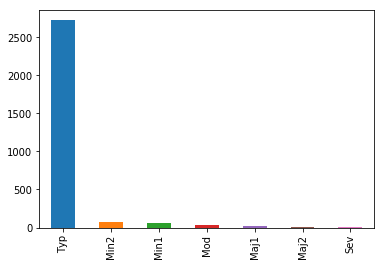

In [1326]:
df.Functional.value_counts().plot(kind='bar')

In [1327]:
df.Functional.fillna('Typ',inplace=True)

In [1328]:
pd.options.display.max_rows=100
df.groupby('MSSubClass').MSZoning.value_counts()

MSSubClass  MSZoning
20          RL          1016
            FV            34
            RM            20
            RH             4
            C (all)        3
30          RM            67
            RL            61
            C (all)        8
            RH             2
40          RL             4
            RM             2
45          RM            11
            RL             6
            RH             1
50          RL           159
            RM           119
            C (all)        7
            RH             2
60          RL           529
            FV            43
            RM             3
70          RM            63
            RL            57
            C (all)        4
            RH             3
75          RM            14
            RL             9
80          RL           115
            RM             3
85          RL            47
            RM             1
90          RL            92
            RM            13
            RH        

In [1329]:
df[df.MSZoning.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.000000,21780,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal,-1
2217,20,NaN,80.000000,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Typ,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml,-1
2251,70,NaN,67.205693,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,None,None,None,0,1,2008,WD,Normal,-1
2905,20,NaN,125.000000,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,None,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,None,None,None,0,5,2006,WD,Normal,-1


In [1330]:
df.loc[(df.MSZoning.isna() & (df.MSSubClass==20)),'MSZoning']='RL'

In [1331]:
df.MSZoning.fillna('RM',inplace=True)

In [1332]:
df.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [1333]:
#df.SaleType.fillna('WD',inplace=True)

In [1339]:
#df[['SaleType','SaleCondition']]
df.Alley.fillna(df.Street,inplace=True)

In [1340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 no

In [1337]:
df.groupby('Street').Alley.value_counts()

Street  Alley
Pave    Grvl     120
        Pave      78
Name: Alley, dtype: int64

In [1341]:
df..SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [1343]:
df[df.SaleType.isna()]['SaleCondition']

Id
2490    Normal
Name: SaleCondition, dtype: object

In [1344]:
df.SaleType.fillna('WD',inplace=True)